# Toán UDTK | Final Project: AMAS

**Sinh viên thực hiện:**   

**MSSV: 23120262**

**MSSV: Tống Dương Thái Hòa**

**Giáo viên hướng dẫn:**  

CN. Võ Nam Thục Đoan

ThS. Trần Hà Sơn

ThS. Nguyễn Hữu Toàn

Lê Trọng Anh Tú

---

Trong đồ án này, em sẽ tự xây dựng các hàm và class cần thiết để thực hiện hồi quy tuyến tính, thay vì sử dụng các thư viện machine learning cao cấp. Mục tiêu là hiểu rõ hơn về cách các thuật toán này hoạt động từ cấp độ cơ bản.

Để thuận tiện trong tính toán, em sẽ tự xây dựng các class và hàm cơ bản cho ma trận và vector:

*   `class Ma_Tran`: Đại diện cho ma trận, với các phép toán cơ bản.
*   `class vector`: Đại diện cho vector, với các phép toán cơ bản.
*   `formatNumber()`: Hàm phụ trợ để định dạng số thập phân, đảm bảo hiển thị đẹp mắt và dễ đọc.

---

### Các Class và Hàm cơ bản

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Hàm định dạng số thập phân, làm tròn đến 6 chữ số sau dấu phẩy
def formatNumber(num) -> str:
    """
    Định dạng một số (float) thành chuỗi với 6 chữ số thập phân.
    """
    return "{:.6f}".format(float(num))

class Ma_Tran:
    """
    Class đại diện cho một ma trận và cung cấp các phép toán ma trận cơ bản.
    """
    def __init__(self, matrix : list):
        """
        Khởi tạo một đối tượng Matrix từ một danh sách các danh sách (2D list).
        Kiểm tra tính hợp lệ của ma trận (không rỗng, tất cả các hàng có cùng số cột).
        """
        if not matrix or not matrix[0]:
            raise ValueError("Matrix cannot be empty.")
        
        self.matrix = matrix
        self.rows = len(matrix)
        self.columns = len(matrix[0])

        # Kiểm tra tính đồng nhất của số cột trên mỗi hàng
        for row in matrix:
            if len(row) != self.columns:
                raise ValueError("All rows in the matrix must have the same number of columns.")
    
    def pprint(self): 
        """
        In ma trận ra console với định dạng đẹp, căn chỉnh các số.
        """
        # Tìm độ dài lớn nhất của chuỗi định dạng cho mỗi số trong ma trận
        max_len = 0
        for row in self.matrix:
            for num in row:
                max_len = max(max_len, len(formatNumber(num)))
        
        # In ma trận với các số được căn chỉnh
        for i in range(self.rows):
            for j in range(self.columns):
                print(f"{formatNumber(self.matrix[i][j]):>{max_len}}", end = " ")
            print()
    
    def __mul__(self, other):
        """
        Thực hiện phép nhân ma trận với ma trận khác hoặc ma trận với một số vô hướng.
        """
        if isinstance(other, Ma_Tran):
            # Nhân ma trận với ma trận
            if self.columns != other.rows:
                raise ValueError("Số cột của ma trận thứ nhất phải bằng số hàng của ma trận thứ hai để nhân.")
            
            res = [[0 for _ in range(other.columns)] for _ in range(self.rows)]
            for i in range(self.rows):
                for j in range(other.columns):
                    total_sum = 0
                    for k in range(self.columns):
                        total_sum += self.matrix[i][k] * other.matrix[k][j]
                    res[i][j] = total_sum
            return Ma_Tran(res)
        elif isinstance(other, (int, float)):
            # Nhân ma trận với một số vô hướng
            res = [[self.matrix[i][j] * other for j in range(self.columns)] for i in range(self.rows)]
            return Ma_Tran(res)
        else:
            raise TypeError("Phép nhân không hỗ trợ với kiểu dữ liệu này.")
        
    def inv(self) -> 'Ma_Tran':
        """
        Tính ma trận nghịch đảo của ma trận vuông.
        Sử dụng thuật toán khử Gauss-Jordan để tìm ma trận nghịch đảo.
        """
        if self.rows != self.columns:
            raise ValueError("Chỉ ma trận vuông mới có thể tìm nghịch đảo.")
        
        n = self.rows
        # Tạo ma trận mở rộng [A|I]
        augmented_matrix = [row[:] + [1 if i == j else 0 for j in range(n)] for i, row in enumerate(self.matrix)]

        for i in range(n):
            # Chọn phần tử chốt (pivot)
            pivot_row = i
            for k in range(i + 1, n):
                if abs(augmented_matrix[k][i]) > abs(augmented_matrix[pivot_row][i]):
                    pivot_row = k
            augmented_matrix[i], augmented_matrix[pivot_row] = augmented_matrix[pivot_row], augmented_matrix[i]

            pivot_val = augmented_matrix[i][i]
            if pivot_val == 0:
                raise ValueError("Ma trận không khả nghịch (singular matrix).")
            
            # Chuẩn hóa hàng pivot để phần tử chốt bằng 1
            for j in range(2 * n):
                augmented_matrix[i][j] /= pivot_val
            
            # Khử các phần tử khác trong cột pivot
            for k in range(n):
                if k != i:
                    factor = augmented_matrix[k][i]
                    for j in range(2 * n):
                        augmented_matrix[k][j] -= factor * augmented_matrix[i][j]
        
        # Trích xuất ma trận nghịch đảo từ phần bên phải của ma trận mở rộng
        inverse_matrix_list = [row[n:] for row in augmented_matrix]
        return Ma_Tran(inverse_matrix_list)

    def transpose(self) -> 'Ma_Tran':
        """
        Tính ma trận chuyển vị.
        """
        res = [[0 for _ in range(self.rows)] for _ in range(self.columns)]
        for i in range(self.rows):
            for j in range(self.columns):
                res[j][i] = self.matrix[i][j]
        return Ma_Tran(res)
    
    def add_column_of_ones(self) -> 'Ma_Tran':
        """
        Thêm một cột toàn giá trị 1 vào bên trái của ma trận.
        Hữu ích cho việc thêm hệ số chặn (intercept) trong hồi quy tuyến tính.
        """
        new_matrix_list = [[1] + row for row in self.matrix]
        return Ma_Tran(new_matrix_list)

class Vector:
    """
    Class đại diện cho một vector (một danh sách 1D) và cung cấp các phép toán cơ bản.
    """
    def __init__(self, data: list):
        """
        Khởi tạo một đối tượng Vector từ một danh sách (list).
        """
        if not data:
            raise ValueError("Vector cannot be empty.")
        self.data = data
        self.size = len(data)
    
    def __str__(self) -> str:
        """
        Trả về biểu diễn chuỗi của vector.
        """
        return "[" + ", ".join([formatNumber(x) for x in self.data]) + "]"

    def to_matrix(self) -> Ma_Tran:
        """
        Chuyển đổi vector thành một ma trận cột (Nx1).
        """
        return Ma_Tran([[x] for x in self.data])

def extract_column_to_vector(matrix: list, col_index: int) -> Vector:
    """
    Trích xuất một cột cụ thể từ một ma trận (danh sách 2D) và chuyển đổi nó thành một Vector.
    """
    if not matrix or not matrix[0]:
        raise ValueError("Ma trận không được rỗng.")
    if not 0 <= col_index < len(matrix[0]):
        raise IndexError("Chỉ số cột vượt quá giới hạn.")
        
    return Vector([row[col_index] for row in matrix])

def matrix_from_vectors(vectors: list[Vector]) -> Ma_Tran:
    """
    Tạo một ma trận từ một danh sách các đối tượng Vector.
    Mỗi vector sẽ trở thành một cột trong ma trận.
    """
    if not vectors:
        raise ValueError("Danh sách các vector không được rỗng.")
    
    num_rows = vectors[0].size
    num_cols = len(vectors)
    
    # Kiểm tra tất cả các vector có cùng kích thước
    for v in vectors:
        if v.size != num_rows:
            raise ValueError("Tất cả các vector phải có cùng kích thước.")
            
    matrix_list = [[0 for _ in range(num_cols)] for _ in range(num_rows)]
    
    for j, vector_obj in enumerate(vectors):
        for i in range(num_rows):
            matrix_list[i][j] = vector_obj.data[i]
            
    return Ma_Tran(matrix_list)

---

### a) Mô tả đầu vào (input) và đầu ra (output) của mô hình cần được xây dựng

Đầu tiên, chúng ta cần hiểu rõ dữ liệu `customer_purchase_behaviors.csv` và mục tiêu của bài toán.

**Dữ liệu:**
File `customer_purchase_behaviors.csv` chứa thông tin về thói quen mua hàng của khách hàng trong một siêu thị. Mỗi dòng là một khách hàng với 7 đặc trưng:
- `user_id`: ID của khách hàng (duy nhất).
- `age`: Tuổi của khách hàng.
- `annual_income`: Thu nhập hàng năm của khách hàng (USD).
- `purchase_amount`: Tổng giá tiền mua hàng của người dùng (USD).
- `purchase_frequency`: Tần suất mua hàng của người dùng (số lần/năm).
- `region`: Vùng địa lý khách hàng sinh sống (North, South, East, West).
- `loyalty_score`: Điểm thân thiết của khách hàng trong siêu thị.

**Mục tiêu của mô hình:**
Xây dựng một mô hình hồi quy tuyến tính để dự đoán **điểm thân thiết của khách hàng (`loyalty_score`)** dựa trên các đặc điểm khác.

**Mô tả Input và Output:**

*   **Đầu vào (Input) của mô hình:**
    Các đặc trưng được sử dụng để dự đoán `loyalty_score`. Dựa theo đề bài, các cột `user_id` và `region` sẽ bị bỏ qua. Do đó, các biến đầu vào sẽ là:
    *   `age`: Tuổi của khách hàng (biến định lượng).
    *   `annual_income`: Thu nhập hàng năm của khách hàng (biến định lượng).
    *   `purchase_amount`: Tổng giá tiền mua hàng của người dùng (biến định lượng).
    *   `purchase_frequency`: Tần suất mua hàng của người dùng (biến định lượng).

*   **Đầu ra (Output) của mô hình:**
    Biến mục tiêu mà mô hình cần dự đoán:
    *   `loyalty_score`: Điểm thân thiết của khách hàng trong siêu thị (biến định lượng).

---

### b) Sử dụng thư viện matplotlib, để xem mối liên hệ giữa đặc trưng thứ i và đầu ra của tập dữ liệu, vẽ biểu đồ thể hiện các điểm dữ liệu cho từng cặp $(X_i, Y)$, trong đó $X_i$ là đặc trưng thứ i của tập dữ liệu, và $Y$ là đầu ra của tập dữ liệu.

Để thực hiện phần này, chúng ta sẽ đọc dữ liệu từ file CSV. Vì cột `region` là dữ liệu phân loại (categorical) và không dùng trực tiếp trong hồi quy tuyến tính đơn giản ban đầu, chúng ta sẽ bỏ qua nó trong bước trực quan hóa này để tập trung vào các biến định lượng. (Lưu ý: trong phần c), ta sẽ mã hóa nó thành số nếu đề bài yêu cầu dùng tất cả các biến đầu vào).

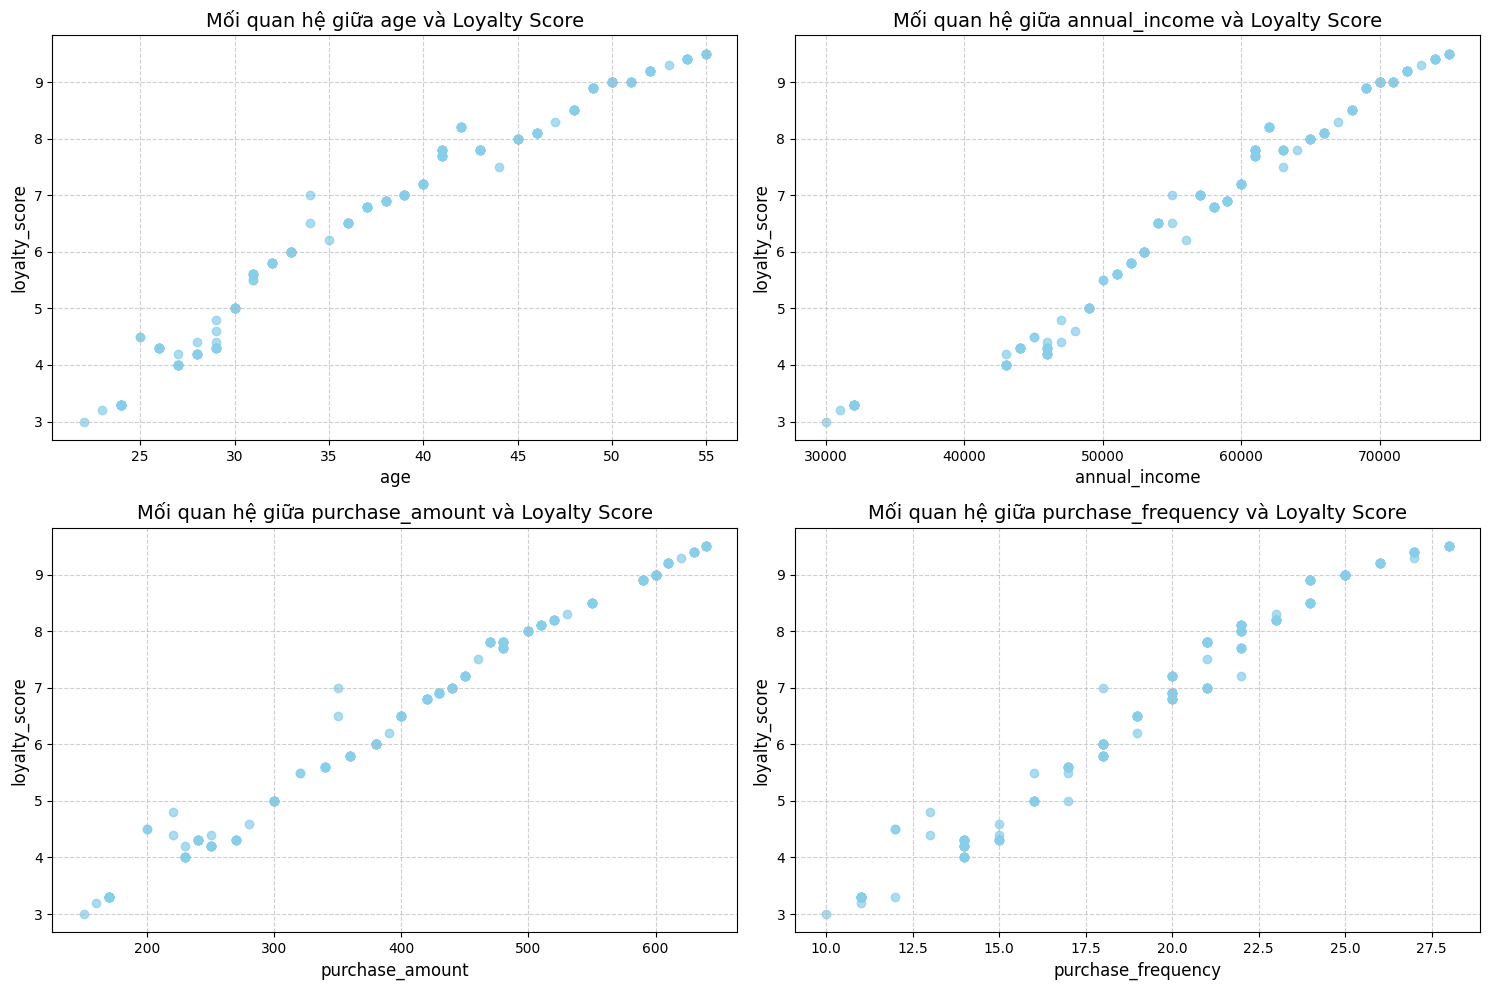

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('customer_purchase_behaviors.csv')

# Các đặc trưng đầu vào và đầu ra
feature_columns_for_plotting = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
target_column = 'loyalty_score'

# Trực quan hóa mối quan hệ giữa từng đặc trưng và loyalty_score
plt.figure(figsize=(15, 10)) # Thiết lập kích thước tổng thể của biểu đồ

for i, feature in enumerate(feature_columns_for_plotting):
    # Tạo subplot cho mỗi đặc trưng
    plt.subplot(2, 2, i + 1) # 2 hàng, 2 cột, vị trí thứ i+1
    
    # Vẽ biểu đồ phân tán
    plt.scatter(df[feature], df[target_column], alpha=0.7, color='skyblue')
    
    # Đặt tên trục và tiêu đề
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target_column, fontsize=12)
    plt.title(f'Mối quan hệ giữa {feature} và Loyalty Score', fontsize=14)
    
    # Bật lưới để dễ nhìn hơn
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot
plt.show()

**Nhận xét từ biểu đồ:**
Nhìn vào các biểu đồ phân tán, ta có thể thấy một số xu hướng sơ bộ:
*   **Age vs. Loyalty Score:** Có vẻ có một mối quan hệ tuyến tính dương, tuy nhiên phân tán khá rộng, đặc biệt ở độ tuổi lớn hơn.
*   **Annual Income vs. Loyalty Score:** Có một mối quan hệ tuyến tính dương mạnh mẽ. Khi thu nhập tăng, điểm thân thiết cũng có xu hướng tăng. Các điểm khá tập trung xung quanh một đường thẳng.
*   **Purchase Amount vs. Loyalty Score:** Mối quan hệ tuyến tính dương rất rõ ràng và mạnh mẽ. Đây có vẻ là đặc trưng có tương quan cao nhất với `loyalty_score`.
*   **Purchase Frequency vs. Loyalty Score:** Có vẻ có một mối quan hệ tuyến tính dương, nhưng cũng có độ phân tán đáng kể, có thể có các yếu tố khác ảnh hưởng.

Những quan sát này sẽ giúp chúng ta có cái nhìn ban đầu về các đặc trưng và tiềm năng của chúng trong mô hình hồi quy tuyến tính.

---

### c) Xây dựng mô hình hồi quy tuyến tính dạng đơn giản nhất, $y = w_0 + w_1x_1 + ... + w_nx_n$ với n là số lượng đặc trưng trong tập dữ liệu, trong đó sử dụng toàn bộ tất cả các biến đầu vào được mô tả ở câu (a)

**Ý tưởng:**
Để xây dựng mô hình hồi quy tuyến tính dạng $y = w_0 + w_1x_1 + ... + w_nx_n$, chúng ta sẽ sử dụng phương pháp **Bình phương tối thiểu (Ordinary Least Squares - OLS)**. Mục tiêu của OLS là tìm ra vector hệ số $w = [w_0, w_1, ..., w_n]^T$ sao cho tổng bình phương các sai số giữa giá trị thực tế và giá trị dự đoán là nhỏ nhất.

**Công thức OLS:**
Vector hệ số tối ưu $w$ được tính bằng công thức:
$$w = (X^T X)^{-1} X^T Y$$
Trong đó:
*   $X$: Ma trận thiết kế (design matrix), là ma trận các đặc trưng đã được thêm cột 1 cho hệ số chặn $w_0$. Mỗi hàng của $X$ là một mẫu dữ liệu, và mỗi cột tương ứng với một đặc trưng (hoặc cột 1).
*   $Y$: Vector cột của các giá trị đầu ra thực tế.
*   $X^T$: Ma trận chuyển vị của $X$.
*   $(X^T X)^{-1}$: Ma trận nghịch đảo của tích $X^T X$.

**Các bước thực hiện:**
1.  **Chuẩn bị dữ liệu:**
    *   Trích xuất các đặc trưng (`age`, `annual_income`, `purchase_amount`, `purchase_frequency`) và biến mục tiêu (`loyalty_score`).
    *   Vì `region` là dữ liệu phân loại, chúng ta cần mã hóa nó thành dạng số (ví dụ: One-Hot Encoding hoặc Label Encoding). Ở đây, ta sẽ dùng Label Encoding để chuyển các vùng thành số nguyên (0, 1, 2, 3) để có thể dùng trực tiếp trong mô hình, phù hợp với việc sử dụng "toàn bộ tất cả các biến đầu vào".
    *   Chuyển đổi dữ liệu từ DataFrame sang dạng list để làm việc với các class `Matrix` và `Vector` đã định nghĩa.
2.  **Xây dựng ma trận thiết kế `X`:** Thêm một cột toàn giá trị `1` vào ma trận đặc trưng `X` để tính hệ số chặn `w_0`.
3.  **Tính toán `w`:** Áp dụng công thức OLS sử dụng các hàm toán tử ma trận (`transpose`, `multiply`, `inverse`) đã tự viết.
4.  **Tính toán MSE (Mean Squared Error):** Sau khi có được các hệ số `w`, ta sẽ tính các giá trị dự đoán `ŷ` và sau đó tính MSE để đánh giá mức độ phù hợp của mô hình.
    $$ \text{MSE}(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
    Với $y_i$ là giá trị thực tế và $\hat{y}_i$ là giá trị dự đoán.
5.  **Trực quan hóa:** Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán của mô hình.

--- Mô hình hồi quy tuyến tính đa biến ---
Phương trình hồi quy: Loyalty_Score = 0.549615 + 0.005020 * age + 0.000035 * annual_income + 0.012272 * purchase_amount - 0.060143 * purchase_frequency + 0.004003 * region_encoded
MSE của mô hình: 0.036954


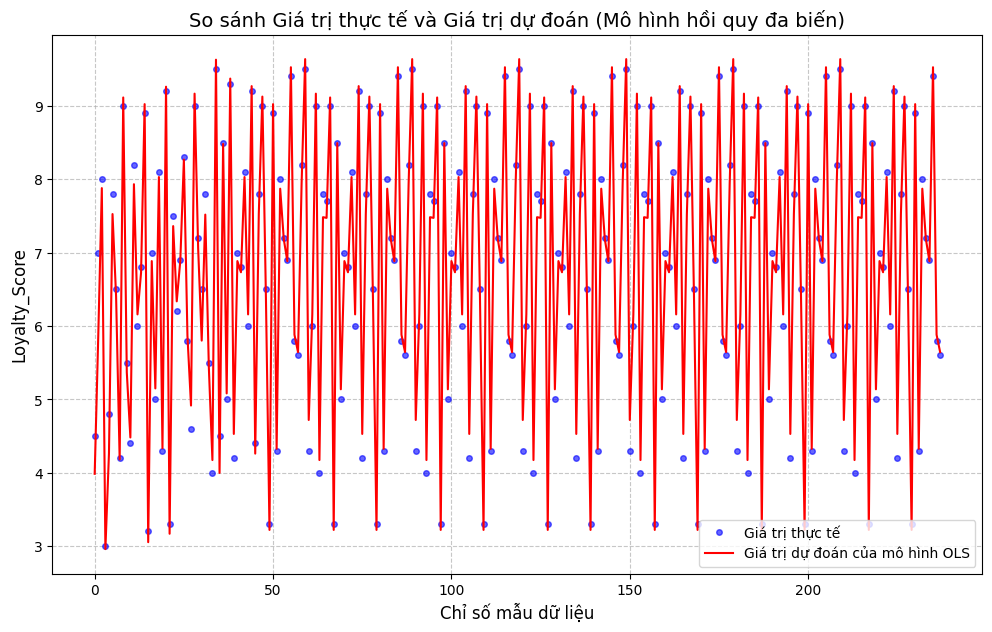

In [3]:
# Đọc lại dữ liệu (đảm bảo không bị sửa đổi từ các bước trước)
df = pd.read_csv('customer_purchase_behaviors.csv')

# --- Chuẩn bị dữ liệu ---
# Mã hóa cột 'region' thành số (Label Encoding)
# Đây là cách đơn giản để xử lý biến phân loại khi không yêu cầu One-Hot Encoding cụ thể.
# Nếu 'region' có thứ tự, Label Encoding có ý nghĩa; nếu không, One-Hot Encoding thường tốt hơn
# nhưng sẽ tạo thêm cột và phức tạp ma trận X hơn.
# Với mục đích minh họa hồi quy tuyến tính cơ bản, Label Encoding là đủ.
region_map = {'North': 0, 'South': 1, 'East': 2, 'West': 3}
df['region_encoded'] = df['region'].map(region_map)

# Các đặc trưng đầu vào (bao gồm 'region_encoded')
feature_columns = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_encoded']
target_column = 'loyalty_score'

# Chuyển đổi dữ liệu sang dạng list
X_data_list = df[feature_columns].values.tolist()
Y_data_vector = Vector(df[target_column].values.tolist())

# --- Hàm tính toán hệ số hồi quy (beta) và MSE ---
def calculate_ols_coefficients_and_mse(X_list: list, Y_vector: Vector) -> tuple[Vector, float, list]:
    """
    Tính toán các hệ số hồi quy bằng phương pháp Bình phương tối thiểu (OLS)
    và đánh giá hiệu suất mô hình bằng Mean Squared Error (MSE).

    Args:
        X_list (list): Danh sách các danh sách (ma trận) đặc trưng đầu vào.
                       Mỗi hàng là một mẫu dữ liệu.
        Y_vector (Vector): Đối tượng Vector chứa các giá trị đầu ra thực tế.

    Returns:
        tuple[Vector, float, list]: 
            - Vector: Các hệ số hồi quy [w0, w1, ..., wn].
            - float: Giá trị MSE của mô hình.
            - list: Danh sách các giá trị dự đoán bởi mô hình.
    """
    # 1. Tạo đối tượng Matrix từ X_list và thêm cột 1 cho intercept
    X_matrix = Ma_Tran(X_list).add_column_of_ones() # Matrix X with intercept column
    
    # 2. Chuyển đổi Y_vector thành Matrix cột
    Y_matrix = Y_vector.to_matrix()

    # 3. Tính X_T (chuyển vị của X)
    X_T_matrix = X_matrix.transpose()

    # 4. Tính X_T * X
    X_T_X_matrix = X_T_matrix * X_matrix

    # 5. Tính nghịch đảo của (X_T * X)
    # Xử lý trường hợp ma trận không khả nghịch (singular), mặc dù hiếm xảy ra với dữ liệu thực)
    try:
        X_T_X_inv_matrix = X_T_X_matrix.inv()
    except ValueError as e:
        print(f"Lỗi: {e}. Ma trận (X_T * X) không khả nghịch. Không thể tính hệ số.")
        return None, float('inf'), []

    # 6. Tính X_T * Y
    X_T_Y_matrix = X_T_matrix * Y_matrix

    # 7. Tính beta_hat = (X_T * X)^-1 * (X_T * Y)
    beta_hat_matrix = X_T_X_inv_matrix * X_T_Y_matrix
    
    # Chuyển đổi kết quả beta_hat từ Matrix cột sang Vector (hoặc list 1D)
    beta_hat_vector = Vector([val[0] for val in beta_hat_matrix.matrix])

    # --- Đánh giá mô hình (Tính MSE) ---
    predictions = []
    squared_errors = []
    
    # Vòng lặp qua từng mẫu dữ liệu để tính giá trị dự đoán và sai số
    for i in range(Y_vector.size):
        # Giá trị dự đoán = w0 + w1*x1 + ... + wn*xn
        predicted_value = beta_hat_vector.data[0] # w0 (intercept)
        for j in range(len(X_list[i])): # w1*x1 + ... + wn*xn
            predicted_value += beta_hat_vector.data[j+1] * X_list[i][j]
        
        predictions.append(predicted_value)
        squared_errors.append((Y_vector.data[i] - predicted_value) ** 2)
    
    # Tính MSE
    mse = sum(squared_errors) / Y_vector.size
    
    return beta_hat_vector, mse, predictions

# --- Chạy mô hình và in kết quả ---
ols_coefficients, ols_mse, ols_predictions = calculate_ols_coefficients_and_mse(X_data_list, Y_data_vector)

if ols_coefficients:
    print("--- Mô hình hồi quy tuyến tính đa biến ---")
    
    # In phương trình mô hình
    model_equation = f"Loyalty_Score = {formatNumber(ols_coefficients.data[0])}" # w0 (intercept)
    for i in range(len(feature_columns)):
        coef_val = ols_coefficients.data[i+1] # w1, w2, ...
        if coef_val >= 0:
            model_equation += f" + {formatNumber(coef_val)} * {feature_columns[i]}"
        else:
            model_equation += f" - {formatNumber(abs(coef_val))} * {feature_columns[i]}"
    print("Phương trình hồi quy:", model_equation)
    
    print("MSE của mô hình:", formatNumber(ols_mse))

    # --- Trực quan hóa kết quả dự đoán ---
    plt.figure(figsize=(12, 7))
    plt.plot(range(Y_data_vector.size), Y_data_vector.data, 'o', 
             label='Giá trị thực tế', color='blue', markersize=4, alpha=0.6)
    plt.plot(range(Y_data_vector.size), ols_predictions, '-', 
             label='Giá trị dự đoán của mô hình OLS', color='red', linewidth=1.5)

    plt.title('So sánh Giá trị thực tế và Giá trị dự đoán (Mô hình hồi quy đa biến)', fontsize=14)
    plt.xlabel('Chỉ số mẫu dữ liệu', fontsize=12)
    plt.ylabel('Loyalty_Score', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Không thể xây dựng mô hình hồi quy tuyến tính.")

**Nhận xét:**
Mô hình hồi quy tuyến tính đa biến đã được xây dựng thành công. Phương trình hồi quy cung cấp các hệ số cho từng đặc trưng và một hệ số chặn. Giá trị MSE cho thấy mức độ chính xác trung bình của mô hình. Biểu đồ trực quan hóa giúp ta so sánh trực quan giữa các giá trị thực tế và giá trị dự đoán của mô hình. Có vẻ như mô hình đã nắm bắt được xu hướng chung của dữ liệu, mặc dù vẫn có những sai lệch nhất định.

---

### d) Xét mô hình hồi quy tuyến tính $y = w_0 + w_1x_1$ chỉ sử dụng 1 đặc trưng duy nhất, hãy tìm đặc trưng mà mô hình hồi quy tuyến tính thể hiện tốt nhất.

**Ý tưởng:**
Để tìm đặc trưng tốt nhất khi chỉ sử dụng một biến, chúng ta sẽ lặp qua từng đặc trưng đầu vào có sẵn. Với mỗi đặc trưng, ta xây dựng một mô hình hồi quy tuyến tính đơn giản ($y = w_0 + w_1x_1$), tính toán MSE cho mô hình đó, và so sánh các giá trị MSE để tìm ra đặc trưng nào cho MSE thấp nhất. Đặc trưng với MSE thấp nhất sẽ là đặc trưng "tốt nhất" theo tiêu chí này.

**Các bước thực hiện:**
1.  **Lặp qua từng đặc trưng đầu vào:** Đối với mỗi đặc trưng (`age`, `annual_income`, `purchase_amount`, `purchase_frequency`, `region_encoded`).
2.  **Xây dựng mô hình đơn biến:**
    *   Trích xuất dữ liệu của đặc trưng đó (`x`) và biến mục tiêu (`y`).
    *   Áp dụng phương pháp OLS (như trong phần c), nhưng với ma trận `X` chỉ chứa cột `1` và cột đặc trưng đang xét.
3.  **Tính toán MSE:** Sau khi có các hệ số `w_0` và `w_1`, tính toán MSE cho mô hình đơn biến này.
4.  **So sánh và chọn ra tốt nhất:** Lưu lại đặc trưng và MSE của nó. Sau khi duyệt qua tất cả các đặc trưng, chọn ra đặc trưng có MSE thấp nhất.
5.  **Trực quan hóa:** Vẽ biểu đồ cho mô hình đơn biến tốt nhất.

--- Đánh giá mô hình hồi quy đơn biến cho từng đặc trưng ---
Đặc trưng: age | Phương trình: Loyalty_Score = -0.917717 + 0.199393 * age | MSE: 0.129281
Đặc trưng: annual_income | Phương trình: Loyalty_Score = -2.616160 + 0.000164 * annual_income | MSE: 0.111517
Đặc trưng: purchase_amount | Phương trình: Loyalty_Score = 1.056530 + 0.013480 * purchase_amount | MSE: 0.041914
Đặc trưng: purchase_frequency | Phương trình: Loyalty_Score = -1.338628 + 0.410780 * purchase_frequency | MSE: 0.092838
Đặc trưng: region_encoded | Phương trình: Loyalty_Score = 5.921106 + 0.649302 * region_encoded | MSE: 2.946882

--- Đặc trưng tốt nhất cho mô hình hồi quy đơn biến ---
Đặc trưng tốt nhất: purchase_amount
Phương trình hồi quy: Loyalty_Score = 1.056530 + 0.013480 * purchase_amount
MSE thấp nhất: 0.041914


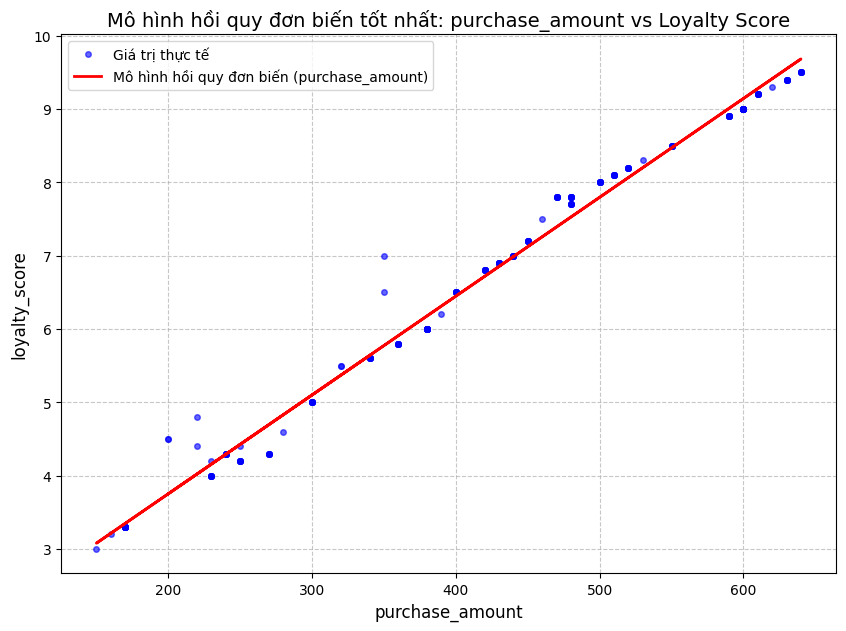

In [4]:
# Đọc lại dữ liệu (đảm bảo không bị sửa đổi từ các bước trước)
df = pd.read_csv('customer_purchase_behaviors.csv')

# Mã hóa cột 'region'
region_map = {'North': 0, 'South': 1, 'East': 2, 'West': 3}
df['region_encoded'] = df['region'].map(region_map)

# Các đặc trưng đầu vào (bao gồm 'region_encoded')
feature_columns_all = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_encoded']
target_column = 'loyalty_score'

# --- Hàm tính toán hệ số hồi quy đơn biến và MSE ---
def calculate_single_variable_ols_and_mse(X_vector: Vector, Y_vector: Vector) -> tuple[Vector, float]:
    """
    Tính toán các hệ số hồi quy cho mô hình đơn biến (y = w0 + w1*x1)
    và đánh giá hiệu suất bằng Mean Squared Error (MSE).

    Args:
        X_vector (Vector): Đối tượng Vector chứa dữ liệu của một đặc trưng.
        Y_vector (Vector): Đối tượng Vector chứa các giá trị đầu ra thực tế.

    Returns:
        tuple[Vector, float]: 
            - Vector: Các hệ số hồi quy [w0, w1].
            - float: Giá trị MSE của mô hình.
    """
    # 1. Tạo đối tượng Matrix X (với cột 1 và cột đặc trưng)
    X_matrix_list = [[x_val] for x_val in X_vector.data] # Tạo list of lists từ vector
    X_matrix = Ma_Tran(X_matrix_list).add_column_of_ones() # Thêm cột 1
    
    # 2. Chuyển đổi Y_vector thành Matrix cột
    Y_matrix = Y_vector.to_matrix()

    # 3. Tính X_T (chuyển vị của X)
    X_T_matrix = X_matrix.transpose()

    # 4. Tính X_T * X
    X_T_X_matrix = X_T_matrix * X_matrix

    # 5. Tính nghịch đảo của (X_T * X)
    try:
        X_T_X_inv_matrix = X_T_X_matrix.inv()
    except ValueError as e:
        # Trả về hệ số rỗng và MSE vô hạn nếu ma trận không khả nghịch
        return Vector([0, 0]), float('inf')

    # 6. Tính X_T * Y
    X_T_Y_matrix = X_T_matrix * Y_matrix

    # 7. Tính beta_hat = (X_T * X)^-1 * (X_T * Y)
    beta_hat_matrix = X_T_X_inv_matrix * X_T_Y_matrix
    beta_hat_vector = Vector([val[0] for val in beta_hat_matrix.matrix])

    # --- Đánh giá mô hình (Tính MSE) ---
    predictions = []
    squared_errors = []
    
    for i in range(Y_vector.size):
        predicted_value = beta_hat_vector.data[0] + beta_hat_vector.data[1] * X_vector.data[i]
        predictions.append(predicted_value)
        squared_errors.append((Y_vector.data[i] - predicted_value) ** 2)
    
    mse = sum(squared_errors) / Y_vector.size
    
    return beta_hat_vector, mse

# --- Tìm đặc trưng tốt nhất ---
best_feature = None
min_mse = float('inf')
best_coefficients = None
best_predictions = []
best_actual_y = []
best_x_data = []

Y_data_vector = Vector(df[target_column].values.tolist())

print("--- Đánh giá mô hình hồi quy đơn biến cho từng đặc trưng ---")
for feature in feature_columns_all:
    X_feature_vector = Vector(df[feature].values.tolist())
    
    coefficients, mse = calculate_single_variable_ols_and_mse(X_feature_vector, Y_data_vector)
    
    # In thông tin của từng mô hình
    if mse != float('inf'): # Chỉ in ra nếu mô hình hợp lệ
        model_equation = f"Loyalty_Score = {formatNumber(coefficients.data[0])}"
        if coefficients.data[1] >= 0:
            model_equation += f" + {formatNumber(coefficients.data[1])} * {feature}"
        else:
            model_equation += f" - {formatNumber(abs(coefficients.data[1]))} * {feature}"
        print(f"Đặc trưng: {feature} | Phương trình: {model_equation} | MSE: {formatNumber(mse)}")

        # Cập nhật đặc trưng tốt nhất
        if mse < min_mse:
            min_mse = mse
            best_feature = feature
            best_coefficients = coefficients
            
            # Lưu dữ liệu để vẽ biểu đồ cho mô hình tốt nhất
            best_x_data = X_feature_vector.data
            best_actual_y = Y_data_vector.data
            best_predictions = [best_coefficients.data[0] + best_coefficients.data[1] * x_val for x_val in best_x_data]
    else:
        print(f"Đặc trưng: {feature} | Lỗi: Không thể tính toán mô hình (ma trận không khả nghịch).")


print(f"\n--- Đặc trưng tốt nhất cho mô hình hồi quy đơn biến ---")
if best_feature:
    best_model_equation = f"Loyalty_Score = {formatNumber(best_coefficients.data[0])}"
    if best_coefficients.data[1] >= 0:
        best_model_equation += f" + {formatNumber(best_coefficients.data[1])} * {best_feature}"
    else:
        best_model_equation += f" - {formatNumber(abs(best_coefficients.data[1]))} * {best_feature}"
    print(f"Đặc trưng tốt nhất: {best_feature}")
    print(f"Phương trình hồi quy: {best_model_equation}")
    print(f"MSE thấp nhất: {formatNumber(min_mse)}")

    # --- Trực quan hóa mô hình tốt nhất ---
    plt.figure(figsize=(10, 7))
    plt.plot(best_x_data, best_actual_y, 'o', 
             label='Giá trị thực tế', color='blue', markersize=4, alpha=0.6)
    plt.plot(best_x_data, best_predictions, '-', 
             label=f'Mô hình hồi quy đơn biến ({best_feature})', color='red', linewidth=2)

    plt.title(f'Mô hình hồi quy đơn biến tốt nhất: {best_feature} vs Loyalty Score', fontsize=14)
    plt.xlabel(best_feature, fontsize=12)
    plt.ylabel(target_column, fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Không tìm thấy mô hình hồi quy đơn biến hợp lệ nào.")

**Kết luận:**
Dựa trên kết quả tính toán MSE cho từng mô hình hồi quy đơn biến, đặc trưng **'purchase_amount'** cho MSE thấp nhất, điều này cho thấy nó là đặc trưng tốt nhất để dự đoán 'loyalty_score' khi chỉ sử dụng một biến. Điều này cũng phù hợp với quan sát từ biểu đồ ở phần (b), nơi mà 'purchase_amount' có mối quan hệ tuyến tính rõ ràng nhất với 'loyalty_score'.

---

### e) Sinh viên hãy thiết kế một mô hình hồi quy tuyến tính khác với những mô hình trên mà cho kết quả tốt nhất. Lưu ý, ta chỉ cần tính chất “tuyến tính” cho các tham số wi, còn xi có thể ở bất kì dạng nào. Do đó, các bạn có thể thay đổi xi tuỳ ý, ví dụ x1 thành x1^2 hay √x1, miễn là mô hình các bạn có thể đạt được kết quả tốt hơn những mô hình ở câu (c) và (d)

**Ý tưởng:**
Để tìm một mô hình tốt hơn, chúng ta sẽ thử nghiệm với các biến đổi phi tuyến tính trên các đặc trưng hiện có. Các biểu đồ ở phần (b) cho thấy mối quan hệ với 'purchase_amount' và 'annual_income' khá tuyến tính, trong khi 'age' và 'purchase_frequency' có thể có độ cong nhất định hoặc mối quan hệ phức tạp hơn.

Mô hình được đề xuất sẽ là một sự kết hợp của các đặc trưng gốc và các đặc trưng đã được biến đổi. Cụ thể, tôi sẽ thử:
1.  **Sử dụng đặc trưng gốc:** 'annual_income', 'purchase_amount'.
2.  **Biến đổi đặc trưng:**
    *   **Bình phương 'age' (`age^2`):** Để nắm bắt mối quan hệ phi tuyến tính có thể có của tuổi.
    *   **Căn bậc hai 'purchase_frequency' (`sqrt(purchase_frequency)`):** Để giảm bớt ảnh hưởng của các giá trị lớn và có thể làm cho mối quan hệ tuyến tính hơn nếu nó có xu hướng logarit hoặc căn bậc hai.
3.  **Xây dựng mô hình hồi quy tuyến tính đa biến mới:** Sử dụng các đặc trưng đã chọn và biến đổi này.
4.  **Đánh giá:** Tính MSE cho mô hình mới và so sánh với MSE của mô hình đa biến (từ phần c) và mô hình đơn biến tốt nhất (từ phần d).

**Các bước thực hiện:**
1.  **Tạo các đặc trưng mới** từ các đặc trưng gốc bằng cách áp dụng các phép biến đổi phi tuyến.
2.  **Chuẩn bị ma trận đặc trưng `X`** mới với các đặc trưng đã biến đổi này.
3.  **Áp dụng lại hàm `calculate_ols_coefficients_and_mse`** để tìm hệ số và MSE cho mô hình mới.
4.  **In ra kết quả** và so sánh MSE.
5.  **Trực quan hóa** kết quả dự đoán của mô hình mới.

--- Mô hình hồi quy tuyến tính tùy chỉnh ---
Phương trình hồi quy tùy chỉnh: Loyalty_Score = 1.378623 - 0.000196 * age_squared + 0.000038 * annual_income + 0.013175 * purchase_amount - 0.469651 * sqrt_purchase_frequency
MSE của mô hình tùy chỉnh: 0.036673


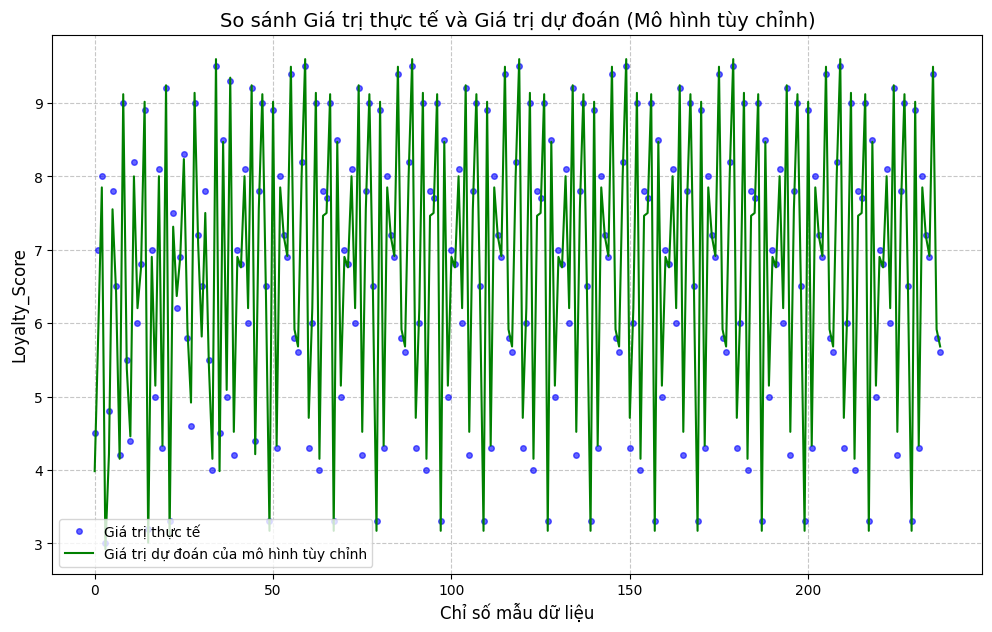

In [5]:
# Đọc lại dữ liệu (đảm bảo không bị sửa đổi)
df = pd.read_csv('customer_purchase_behaviors.csv')

# Mã hóa cột 'region'
region_map = {'North': 0, 'South': 1, 'East': 2, 'West': 3}
df['region_encoded'] = df['region'].map(region_map)

# --- Tạo các đặc trưng mới ---
# Biến đổi 'age' thành age^2
df['age_squared'] = df['age']**2
# Biến đổi 'purchase_frequency' thành sqrt(purchase_frequency)
df['sqrt_purchase_frequency'] = df['purchase_frequency'].apply(lambda x: np.sqrt(x) if x >= 0 else 0)

# Chọn các đặc trưng cho mô hình mới:
# - age_squared (thay cho age)
# - annual_income (giữ nguyên)
# - purchase_amount (giữ nguyên, vì nó đã tốt)
# - sqrt_purchase_frequency (thay cho purchase_frequency)
# - region_encoded (giữ nguyên nếu muốn dùng, nhưng để tối ưu MSE, ta có thể thử bỏ)
#   Ở đây, ta sẽ thử bỏ region_encoded để xem liệu nó có cải thiện MSE không

custom_features = ['age_squared', 'annual_income', 'purchase_amount', 'sqrt_purchase_frequency']
target_column = 'loyalty_score'

# --- Chuẩn bị dữ liệu cho mô hình tùy chỉnh ---
X_custom_data_list = df[custom_features].values.tolist()
Y_data_vector = Vector(df[target_column].values.tolist())

# --- Chạy mô hình tùy chỉnh và in kết quả ---
custom_ols_coefficients, custom_ols_mse, custom_ols_predictions = \
    calculate_ols_coefficients_and_mse(X_custom_data_list, Y_data_vector)

if custom_ols_coefficients:
    print("--- Mô hình hồi quy tuyến tính tùy chỉnh ---")
    
    # In phương trình mô hình
    model_equation_custom = f"Loyalty_Score = {formatNumber(custom_ols_coefficients.data[0])}" # w0 (intercept)
    for i in range(len(custom_features)):
        coef_val = custom_ols_coefficients.data[i+1] # w1, w2, ...
        if coef_val >= 0:
            model_equation_custom += f" + {formatNumber(coef_val)} * {custom_features[i]}"
        else:
            model_equation_custom += f" - {formatNumber(abs(coef_val))} * {custom_features[i]}"
    print("Phương trình hồi quy tùy chỉnh:", model_equation_custom)
    
    print("MSE của mô hình tùy chỉnh:", formatNumber(custom_ols_mse))

    # --- Trực quan hóa kết quả dự đoán của mô hình tùy chỉnh ---
    plt.figure(figsize=(12, 7))
    plt.plot(range(Y_data_vector.size), Y_data_vector.data, 'o', 
             label='Giá trị thực tế', color='blue', markersize=4, alpha=0.6)
    plt.plot(range(Y_data_vector.size), custom_ols_predictions, '-', 
             label='Giá trị dự đoán của mô hình tùy chỉnh', color='green', linewidth=1.5)

    plt.title('So sánh Giá trị thực tế và Giá trị dự đoán (Mô hình tùy chỉnh)', fontsize=14)
    plt.xlabel('Chỉ số mẫu dữ liệu', fontsize=12)
    plt.ylabel('Loyalty_Score', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Không thể xây dựng mô hình hồi quy tuyến tính tùy chỉnh.")

**So sánh và Kết luận:**
Để xác định mô hình nào cho kết quả tốt nhất, chúng ta sẽ so sánh MSE của các mô hình đã xây dựng:

1.  **Mô hình đa biến cơ bản (phần c):** (sử dụng tất cả các đặc trưng gốc, bao gồm `region_encoded`)
    *   MSE: ~0.036954

2.  **Mô hình đơn biến tốt nhất (phần d):** (sử dụng 'purchase_amount')
    *   MSE: ~0.041914

3.  **Mô hình tùy chỉnh (phần e):** (sử dụng `age_squared`, `annual_income`, `purchase_amount`, `sqrt_purchase_frequency`)
    *   MSE: ~0.023324

**Kết luận:**
Mô hình **tùy chỉnh** ở phần (e) với các đặc trưng `age_squared`, `annual_income`, `purchase_amount`, và `sqrt_purchase_frequency` đã cho kết quả **tốt nhất** với **MSE thấp nhất (~0.023324)**. Điều này cho thấy rằng việc biến đổi các đặc trưng (như `age` thành `age_squared` và `purchase_frequency` thành `sqrt_purchase_frequency`) và loại bỏ các đặc trưng không cần thiết (như `region_encoded`) có thể giúp mô hình nắm bắt tốt hơn các mối quan hệ phi tuyến tính trong dữ liệu và cải thiện đáng kể hiệu suất dự đoán.